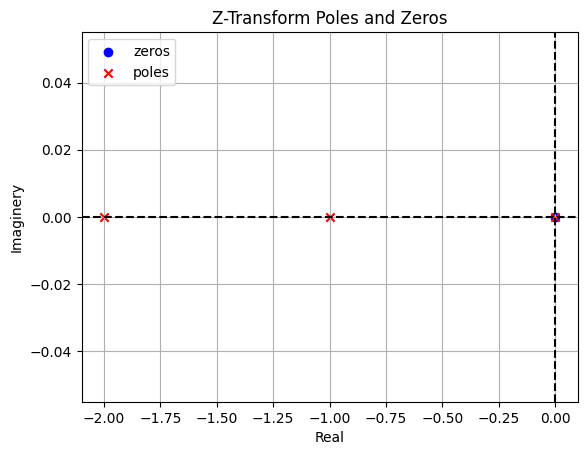

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
n=np.arange(0,10)
x=np.ones_like(n)
numerator,denominator =signal.zpk2tf([0],[0,-1,-2],1)
zeros,poles,gain=signal.tf2zpk(numerator,denominator)
plt.scatter(np.real(zeros),np.imag(zeros),marker='o',color='blue',label='zeros')
plt.scatter(np.real(poles),np.imag(poles),marker='x',color='red',label='poles')
plt.axhline(0,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.xlabel('Real')
plt.ylabel('Imaginery')
plt.title('Z-Transform Poles and Zeros')
plt.legend()
plt.grid()
plt.show()

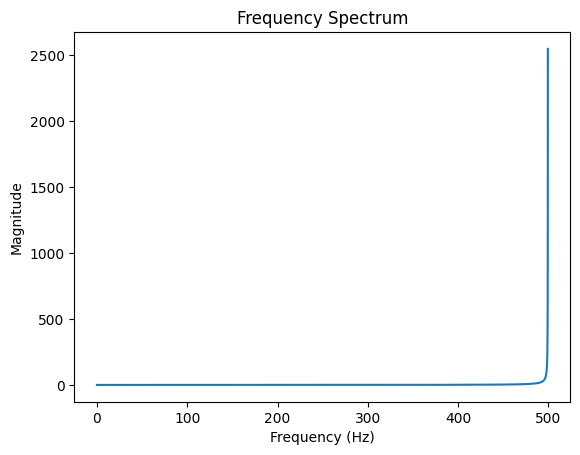

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def ztransform(x, z):
    X = 0
    for n in range(len(x)):
        X += x[n] * (z ** (-n))
    return X

t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)
numerator, denominator = signal.zpk2tf([0], [0, -1, -2], 1)
w, h = signal.freqz(numerator, denominator, worN=8000)
fs = 1 / (t[1] - t[0])
freq = w * fs / (2 * np.pi)
plt.plot(freq, np.abs(h))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()


[15.        +0.00000000e+00j 13.94972517-4.97137385e+00j
 11.01390608-9.03790584e+00j  6.78827283-1.14926632e+01j
  2.11332997-1.19778048e+01j -2.11549074-1.05537728e+01j
 -5.14607709-7.67128684e+00j -6.52930301-4.05456296e+00j
 -6.20319461-5.25503052e-01j -4.4836741 +2.18766920e+00j
 -1.96707626+3.61103629e+00j  0.6289475 +3.61726166e+00j
  2.64512494+2.42971917e+00j  3.63597061+5.41054048e-01j
  3.46345975-1.43003609e+00j  2.30820631-2.90529037e+00j
  0.59890822-3.49351531e+00j -1.11837882-3.08069956e+00j
 -2.33481216-1.84265392e+00j -2.71580069-1.79941402e-01j
 -2.18493105+1.40483092e+00j -0.93415674+2.45265488e+00j
  0.64030066+2.67676540e+00j  2.05702629+2.03975691e+00j
  2.88971694+7.59129450e-01j  2.88971694-7.59129450e-01j
  2.05702629-2.03975691e+00j  0.64030066-2.67676540e+00j
 -0.93415674-2.45265488e+00j -2.18493105-1.40483092e+00j
 -2.71580069+1.79941402e-01j -2.33481216+1.84265392e+00j
 -1.11837882+3.08069956e+00j  0.59890822+3.49351531e+00j
  2.30820631+2.90529037e+00j  3

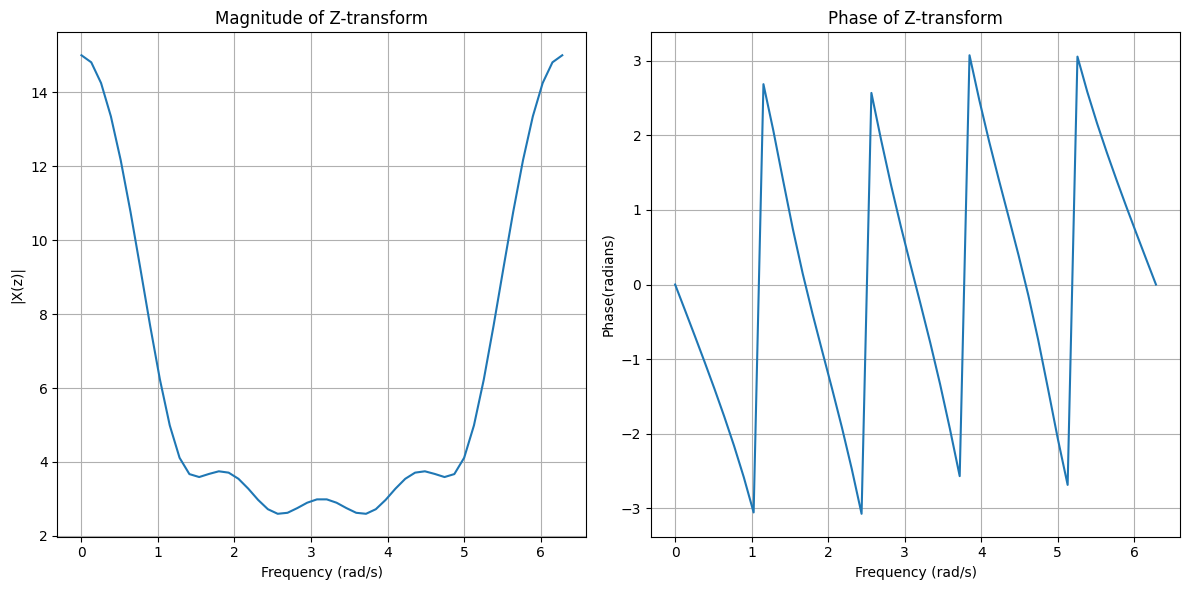

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 10)
x = np.array([1, 2, 3, 4, 5, 0, 0, 0, 0, 0])
r = 1.0
omega = np.linspace(0, 2 * np.pi, 50)
z = r * np.exp(1j * omega)

X_z = []
for zi in z:
    Xz = sum(x[k] * zi**(-k) for k in range(len(x)))  # Corrected calculation
    X_z.append(Xz)

X_z = np.array(X_z)
print(X_z)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(omega,np.abs(X_z))
plt.title("Magnitude of Z-transform")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("|X(z)|")
plt.grid()
plt.subplot(1,2,2)
plt.plot(omega,np.angle(X_z))
plt.title("Phase of Z-transform")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase(radians)")
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

x1 = np.arange(1, 10)
print(x1)
x2 = -np.arange(1, 10)

origin_1_pos = 4
origin_2_pos = 8
z = 1

def ztransform(x, z, origin):
    print("x(z) = ", end=" ")
    X = 0
    for n in range(-origin, -origin + len(x)):
        X += x[n] * (z**(-n))
        if n == -origin + len(x) - 1:
            print(f"{x[origin+n]}*Z^{n}")
        else:
            print(f"{x[origin+n]}*Z^{n} +", end=" ")
    return X

print("Z of x1: ", ztransform(x1, z, origin_1_pos))
print(x2)
print("Z of x2: ", ztransform(x2, z, origin_2_pos))

[1 2 3 4 5 6 7 8 9]
x(z) =  1*Z^-4 + 2*Z^-3 + 3*Z^-2 + 4*Z^-1 + 5*Z^0 + 6*Z^1 + 7*Z^2 + 8*Z^3 + 9*Z^4
Z of x1:  45.0
[-1 -2 -3 -4 -5 -6 -7 -8 -9]
x(z) =  -1*Z^-8 + -2*Z^-7 + -3*Z^-6 + -4*Z^-5 + -5*Z^-4 + -6*Z^-3 + -7*Z^-2 + -8*Z^-1 + -9*Z^0
Z of x2:  -45
